In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import src.load.load_image as ld
#import display.display_images as di

path_data_fld = "C:/Users/Felix/Documents/GitHub/Antarctic_TMA/data"

# load two images to compare
image1 = ld.load_image(path_data_fld + "/images/CA184632V0341.tif")
image2 = ld.load_image(path_data_fld + "/images/CA184632V0342.tif")

print(image1.shape, image2.shape)

#di.display_images([image1, image2])

(9522, 10140) (9522, 10140)


In [3]:
import numpy as np
mask1 = np.ones_like(image1)
mask2 = np.ones_like(image2)

border_width = 500

# Set the left border to 0
mask1[:, :border_width] = 0
mask2[:, :border_width] = 0

# Set the right border to 0
mask1[:, -border_width:] = 0
mask2[:, -border_width:] = 0

# Set the top border to 0
mask1[:border_width, :] = 0
mask2[:border_width, :] = 0

# Set the bottom border to 0
mask1[-border_width:, :] = 0
mask2[-border_width:, :] = 0


TiePointDetector initialized using lightglue on cuda
Start initial matching
Image 1 resized to (1878, 2000)
Image 2 resized to (1878, 2000)


C:\Users\Felix\Documents\GitHub\Antarctic_TMA\external\lightglue\lightglue.py:106: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  return F.scaled_dot_product_attention(*args).to(q.dtype)


712 initial matches found (0.7580000162124634)
191 of 712 tie-points are masked


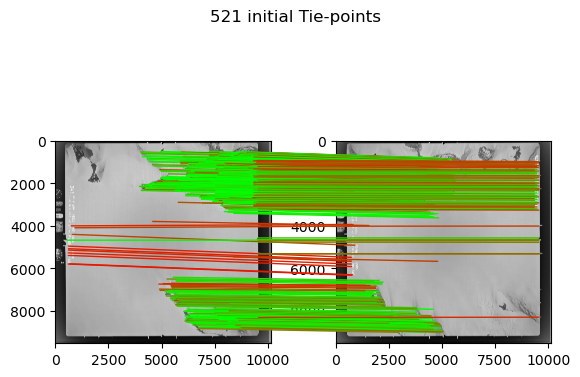

Start additional matching
 Additional matching: 1/30
  No tie-points in base tile
 Additional matching: 2/30
  No tie-points in base tile
 Additional matching: 3/30
  432 tie-points found in tile
 Additional matching: 4/30
  676 tie-points found in tile
 Additional matching: 5/30
  1609 tie-points found in tile
 Additional matching: 6/30
  No tie-points in base tile
 Additional matching: 7/30
  No tie-points in base tile
 Additional matching: 8/30
  439 tie-points found in tile
 Additional matching: 9/30
  605 tie-points found in tile
 Additional matching: 10/30
  144 tie-points found in tile
 Additional matching: 11/30
  382 tie-points found in tile
 Additional matching: 12/30
  No tie-points in base tile
 Additional matching: 13/30
  0 tie-points found in tile
 Additional matching: 14/30
  No tie-points in base tile
 Additional matching: 15/30
  47 tie-points found in tile
 Additional matching: 16/30
  451 tie-points found in tile
 Additional matching: 17/30
  No tie-points in base t

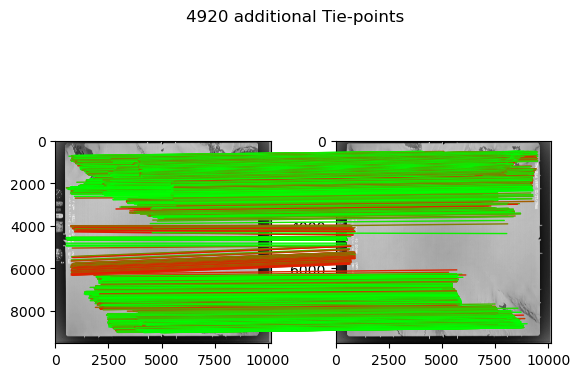

Start extra matching
[[9239 2292]
 [8170 8468]
 [4987 1784]
 [5680 6532]
 [4449 2138]
 [5926 2327]
 [6157 8584]
 [8583  641]
 [5385 7223]
 [7067 1021]
 [ 557 4660]
 [9249 2263]
 [9237 2218]
 [4588 2163]
 [4989 1757]
 [4922 2097]
 [5010 1747]
 [7932 8439]
 [8085 8466]
 [5047 2157]
 [5920 2360]
 [9262 2284]
 [4426 2142]
 [4604 1989]
 [8026 8377]] [[5576 2555]
 [4352 8676]
 [1505 1951]
 [2161 6657]
 [1067 2286]
 [2505 2506]
 [2520 8754]
 [4809  943]
 [1777 7346]
 [3586 1269]
 [ 572 4664]
 [5582 2529]
 [5568 2484]
 [1212 2313]
 [1499 1926]
 [1503 2256]
 [1522 1916]
 [4153 8645]
 [4280 8674]
 [1665 2317]
 [2505 2537]
 [5595 2547]
 [1048 2289]
 [1177 2141]
 [4262 8582]]
 Extra matching: 1/30
  Skip tile (x or y below zero)
 Extra matching: 2/30
  19 tie-points found in tile
 Extra matching: 3/30
  331 tie-points found in tile
 Extra matching: 4/30
  551 tie-points found in tile
 Extra matching: 5/30
  1312 tie-points found in tile
 Extra matching: 6/30
  Skip tile (x or y below zero)
 Extra 

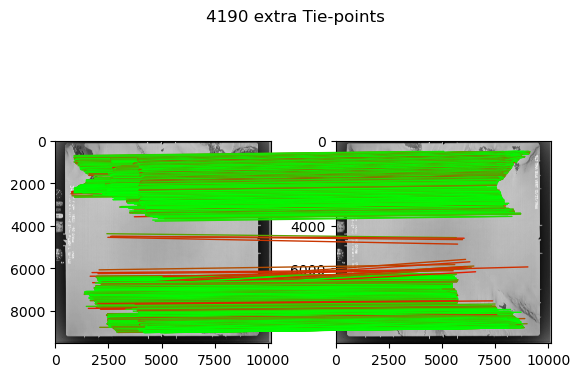

8828 outliers removed with Threshold 0.0
391 outliers removed with RANSAC


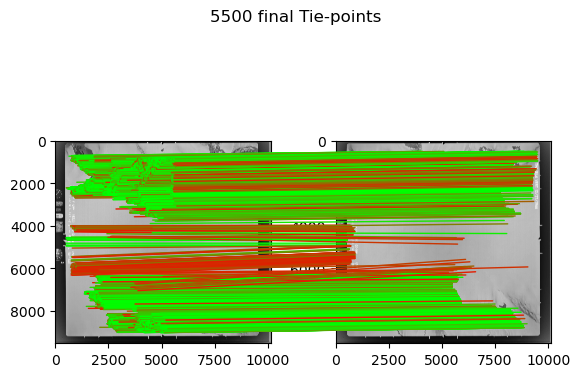

(array([[ 514., 4817.,  500., 4815.],
        [ 516., 2211., 3858., 2077.],
        [ 516., 4551.,  500., 4547.],
        ...,
        [5698., 1242., 9501.,  928.],
        [5700., 1275., 9501.,  963.],
        [5711., 3068., 9319., 2851.]]),
 array([0.9891789 , 0.89784682, 0.99007219, ..., 0.63157356, 0.84721571,
        0.36559018]))

In [5]:
import src.snippets.find_tie_points as ftp

# init TiePointDetector
finder = ftp.TiePointDetector(matching_method="lightglue", verbose=True)

finder.find_tie_points(image1, image2, mask1=mask1, mask2=mask2)